# Association Analysis
 
## Apriori Algorithm in R

In R, the apriori algorithm is implemented on the <i> arules </i> package.
 
This package comes with some datasets that are suitable to apply association rules analysis. We will use the Groceries dataset. It contains real life grocery transactions. The data is formatted in a special class format called <i> transactions </i>. This format has a complex structure that is manipulated using special functions.
 
To be able to visualize this dataset, we will also use the <i>arulesViz</i> package.

In [1]:
library(arules)
library(arulesViz)

data(Mushroom)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



In [2]:
class(Mushroom)

[1] "transactions"
attr(,"package")
[1] "arules"

In [4]:
str(Mushroom)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:178360] 1 7 10 16 23 30 34 35 38 43 ...
  .. .. ..@ p       : int [1:8125] 0 22 45 68 90 112 135 158 180 202 ...
  .. .. ..@ Dim     : int [1:2] 114 8124
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	114 obs. of  3 variables:
  .. ..$ labels   : chr [1:114] "Class=edible" "Class=poisonous" "CapShape=bell" "CapShape=conical" ...
  .. ..$ variables: Factor w/ 23 levels "Bruises","CapColor",..: 5 5 3 3 3 3 3 3 4 4 ...
  .. ..$ levels   : Factor w/ 63 levels "almond","anise",..: 19 47 4 15 26 33 56 16 23 32 ...
  ..@ itemsetInfo:'data.frame':	8124 obs. of  0 variables


In [5]:
### Lets see how many transactions the dataset has
length(Mushroom)

[1] 8124

In [6]:
inspect(Mushroom)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
inspect(Mushroom[1:5])

    items                    
[1] {Class=poisonous,        
     CapShape=convex,        
     CapSurf=smooth,         
     CapColor=brown,         
     Bruises=bruises,        
     Odor=pungent,           
     GillAttached=free,      
     GillSpace=close,        
     GillSize=narrow,        
     GillColor=black,        
     StalkShape=enlarging,   
     StalkRoot=equal,        
     SurfaceAboveRing=smooth,
     SurfaceBelowRing=smooth,
     ColorAboveRing=white,   
     ColorBelowRing=white,   
     VeilType=partial,       
     VeilColor=white,        
     RingNumber=one,         
     RingType=pendant,       
     Spore=black,            
     Habitat=urban}          
[2] {Class=edible,           
     CapShape=convex,        
     CapSurf=smooth,         
     CapColor=yellow,        
     Bruises=bruises,        
     Odor=almond,            
     GillAttached=free,      
     GillSpace=close,        
     GillSize=broad,         
     GillColor=black,        
     Stalk

In [8]:
items <- itemFrequency(Mushroom)
head(items)
summary(items)

Class=edible  Class=poisonous    CapShape=bell CapShape=conical 
    0.5179714426     0.4820285574     0.0556376169     0.0004923683 
   CapShape=flat CapShape=knobbed 
    0.3879862137     0.1019202363

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0004924 0.0132939 0.0723781 0.1925851 0.2850812 1.0000000 

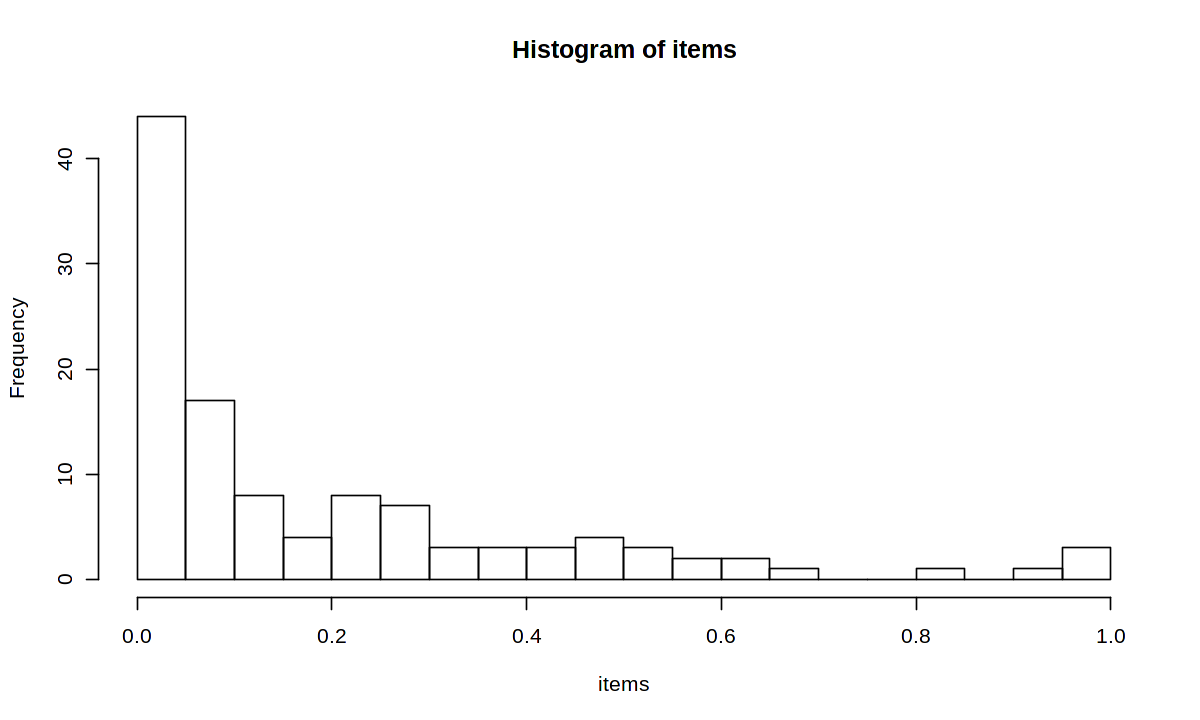

In [10]:
options(repr.plot.width = 10, repr.plot.height = 6)
hist(items,breaks = 20)

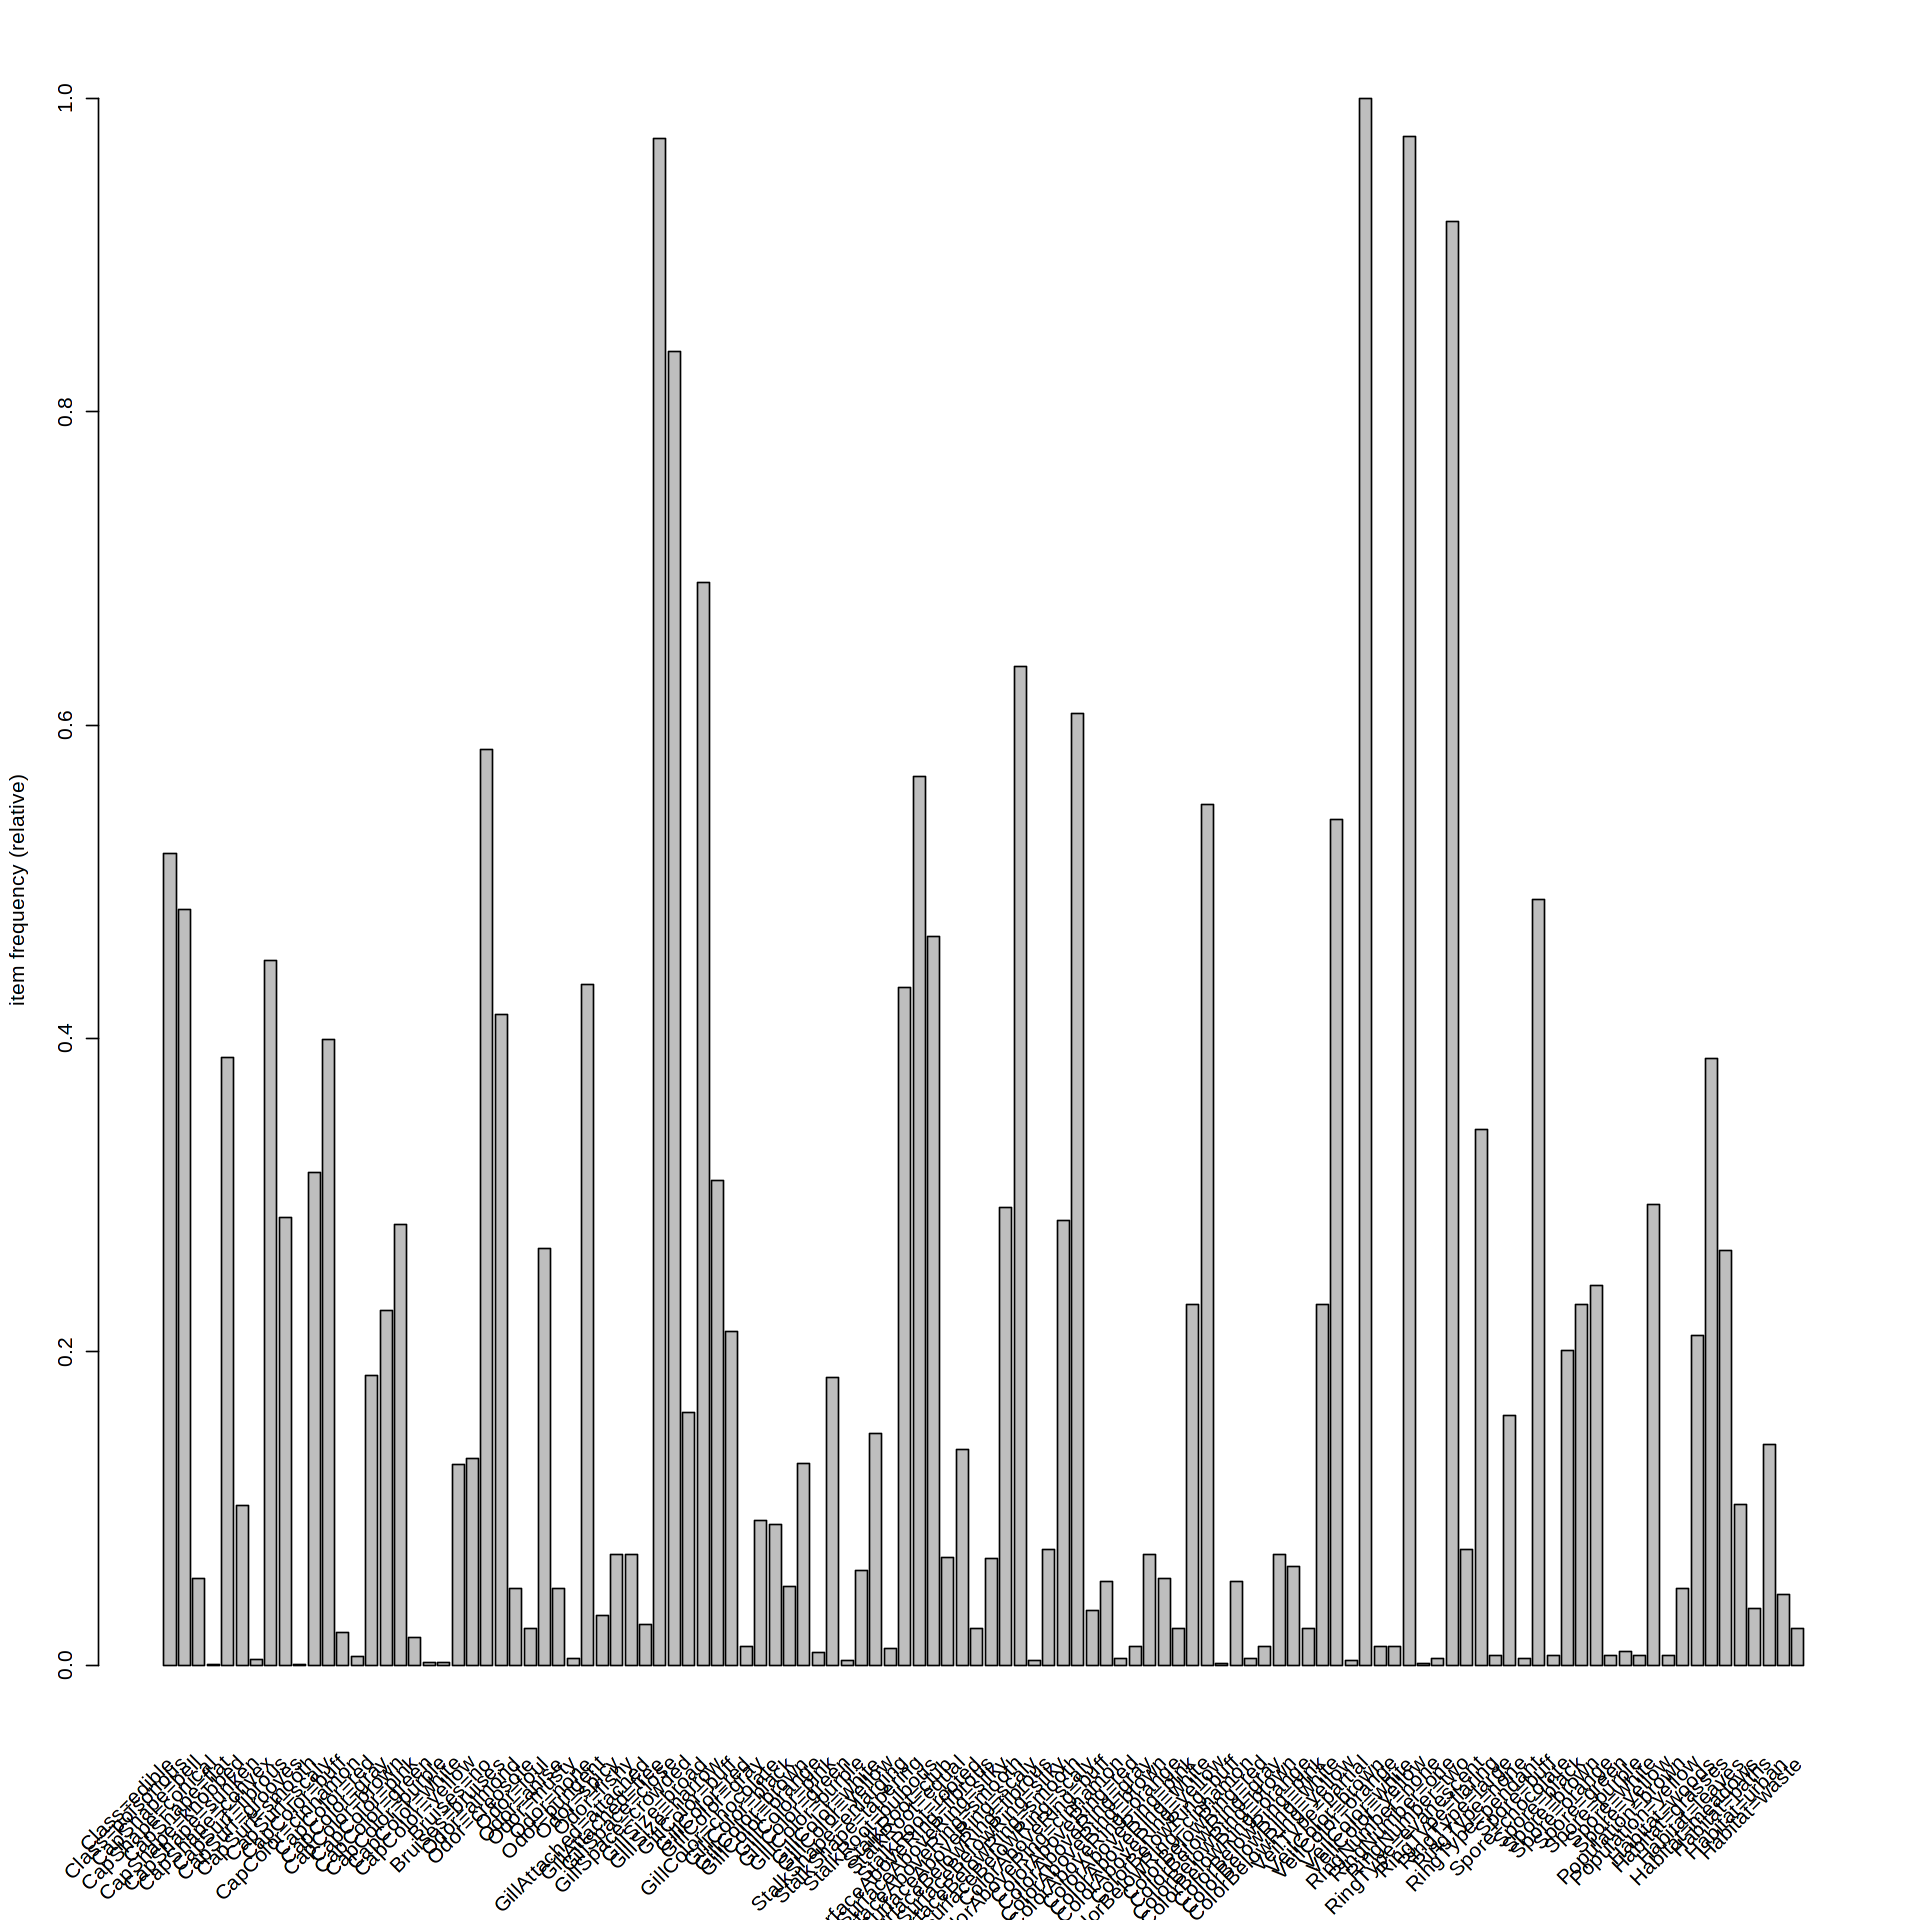

In [22]:
options(repr.plot.width = 16, repr.plot.height = 16)
itemFrequencyPlot(Mushroom)

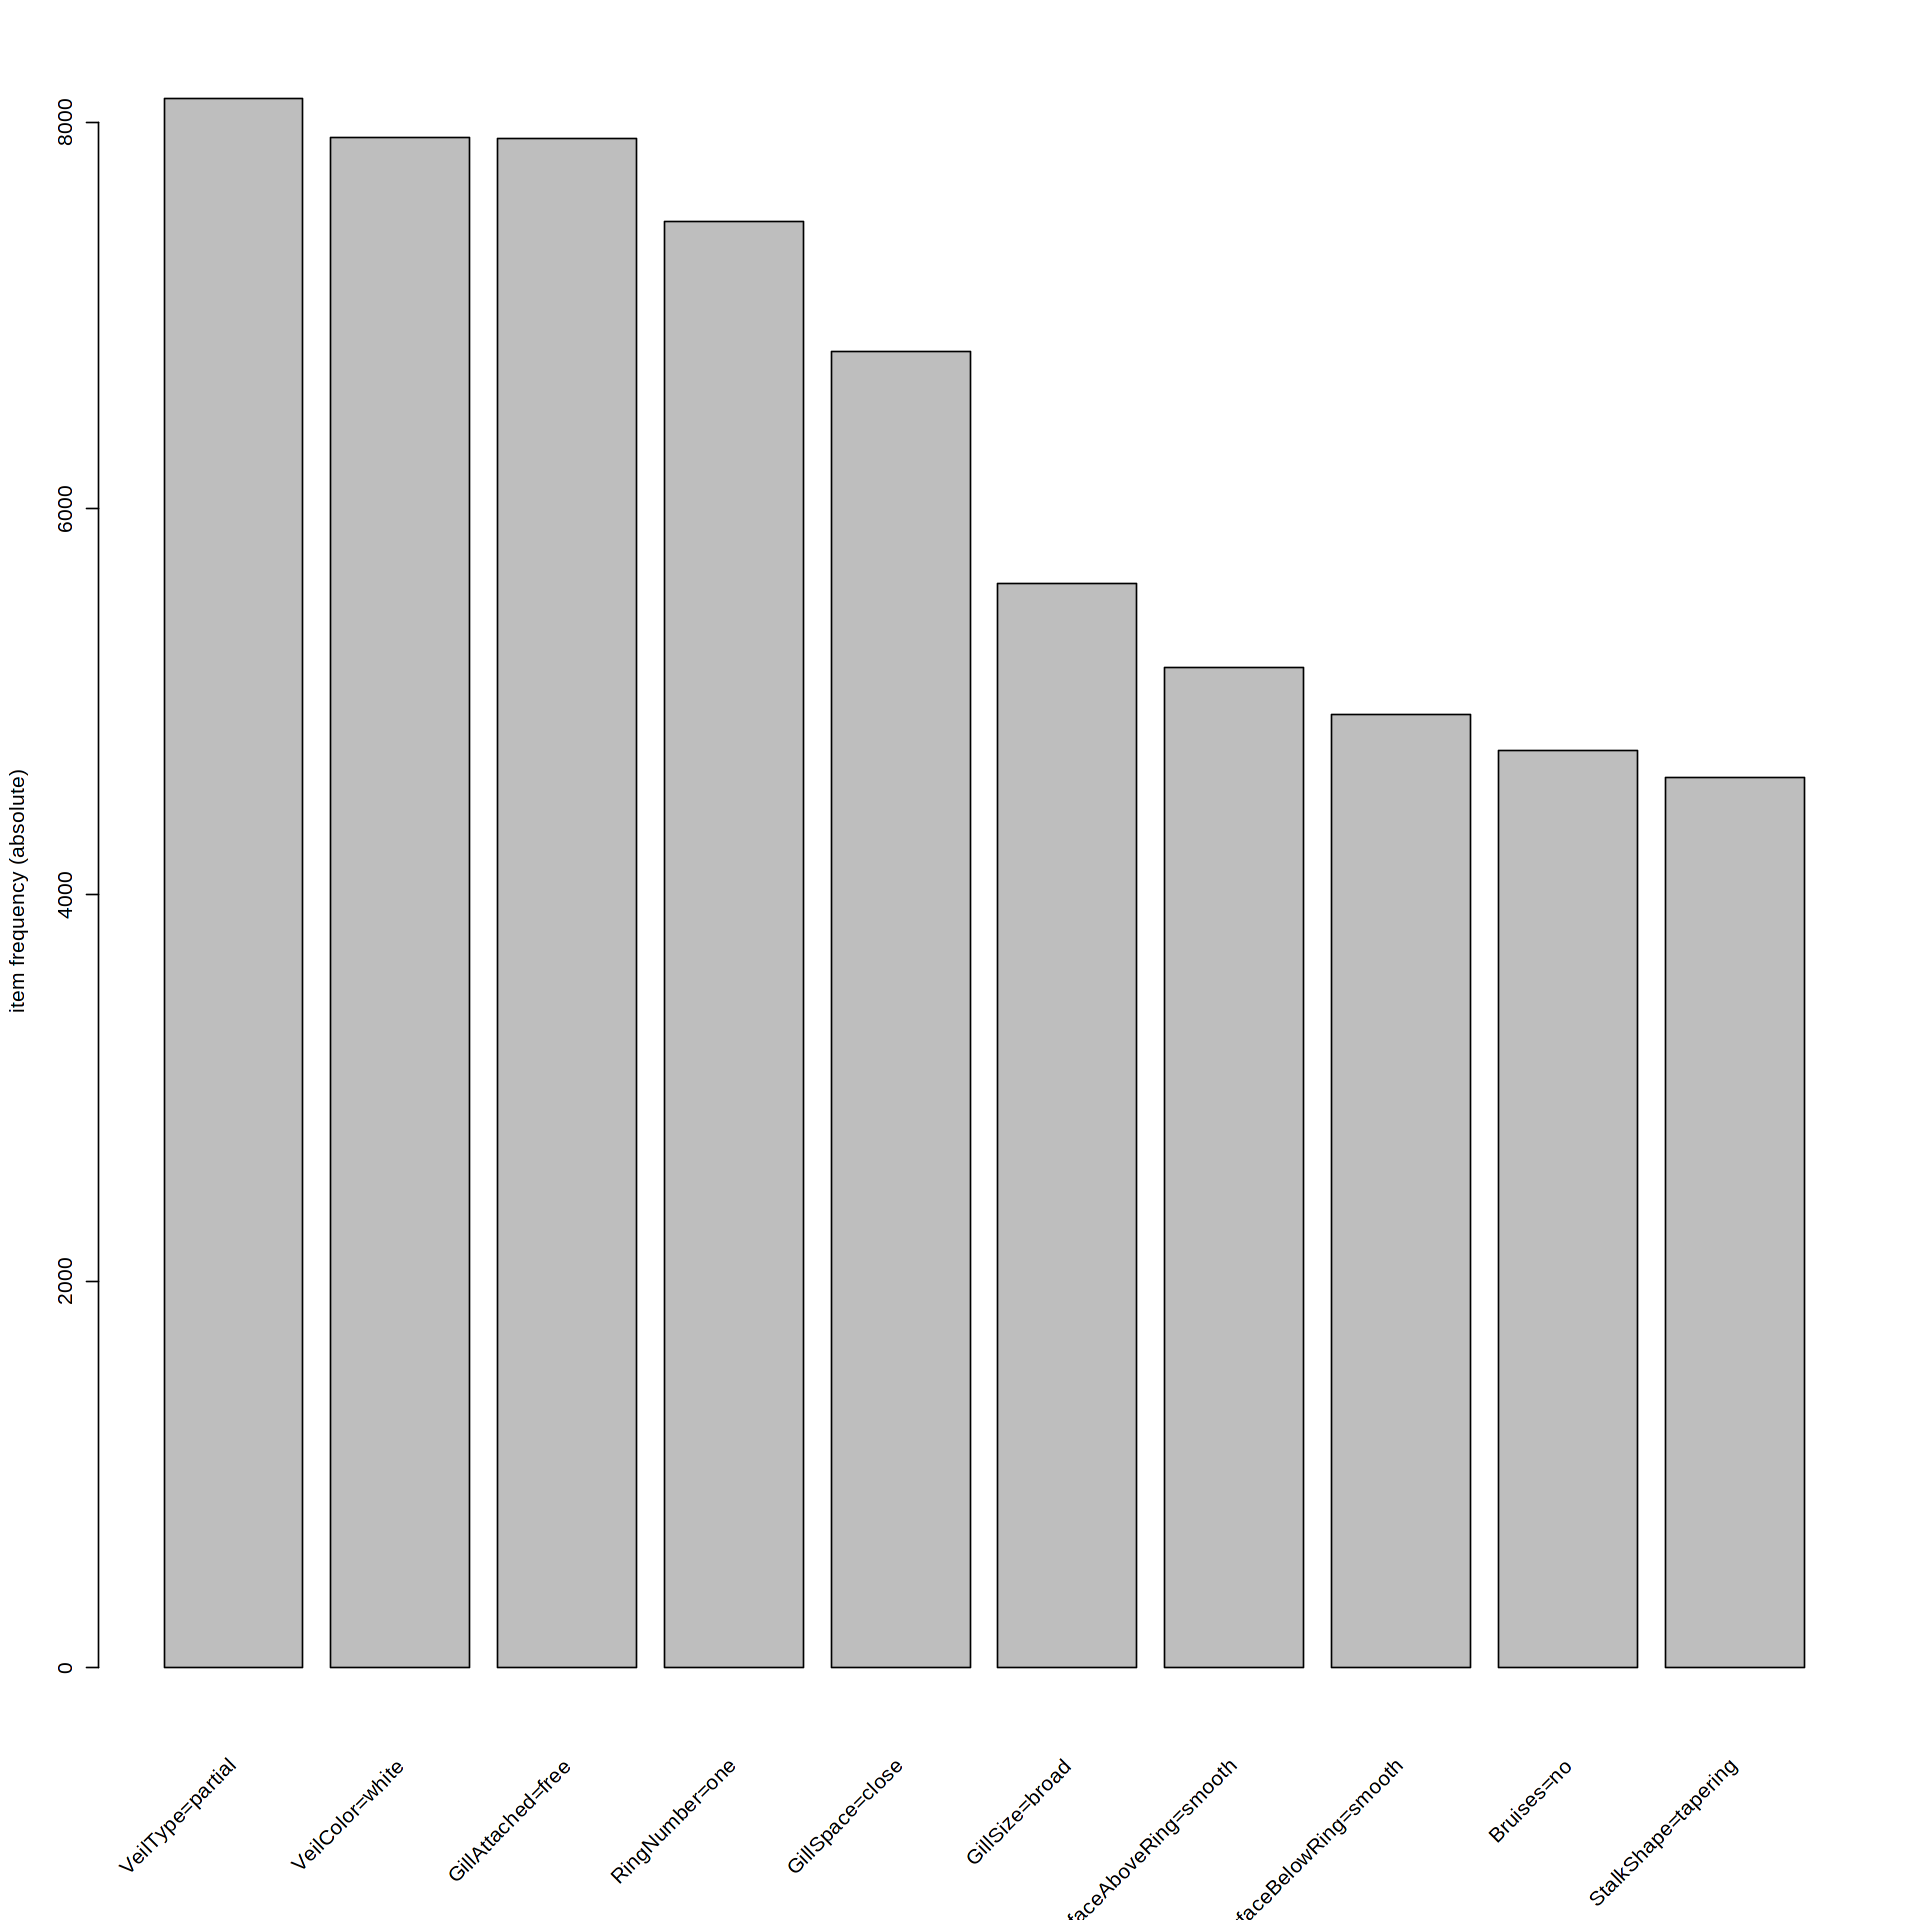

In [25]:
itemFrequencyPlot(Mushroom, topN=10, type="absolute")

In [27]:
### using the apriori algorithm
itemsets <- apriori(data = Mushroom)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 812 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [53 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = Mushroom):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [3.53s].
writing ... [2142749 rule(s)] done [0.50s].
creating S4 object  ... done [1.34s].


In [31]:
## We can define how to retrieve the list of individual frequent items. For this we set minlen and maxlen to 1.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=1,maxlen=1,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen            target   ext
      1 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [84 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1

Warning message in apriori(data = Mushroom, parameter = list(minlen = 1, maxlen = 1, :
“Mining stopped (maxlen reached). Only patterns up to a length of 1 returned!”


 done [0.00s].
writing ... [84 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [32]:
## Lets see the first ten items with the highest support
inspect(head(sort(itemsets, by="support"),10))

     items                     support   count
[1]  {VeilType=partial}        1.0000000 8124 
[2]  {VeilColor=white}         0.9753816 7924 
[3]  {GillAttached=free}       0.9741507 7914 
[4]  {RingNumber=one}          0.9217134 7488 
[5]  {GillSpace=close}         0.8385032 6812 
[6]  {GillSize=broad}          0.6907927 5612 
[7]  {SurfaceAboveRing=smooth} 0.6371246 5176 
[8]  {SurfaceBelowRing=smooth} 0.6075825 4936 
[9]  {Bruises=no}              0.5844412 4748 
[10] {StalkShape=tapering}     0.5672083 4608 


In [33]:
itemsets

set of 84 itemsets 

In [34]:
## Now we will retrieve the list of frequent paired items. We set minlen and maxlen to 2.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=2,maxlen=2,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen            target   ext
      2 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [84 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2

Warning message in apriori(data = Mushroom, parameter = list(minlen = 2, maxlen = 2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.01s].
writing ... [1805 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [35]:
## And check the first ten item pairs with the highest support
inspect(head(sort(itemsets, by="support"),10))


     items                                support   count
[1]  {VeilType=partial,VeilColor=white}   0.9753816 7924 
[2]  {GillAttached=free,VeilType=partial} 0.9741507 7914 
[3]  {GillAttached=free,VeilColor=white}  0.9731659 7906 
[4]  {VeilType=partial,RingNumber=one}    0.9217134 7488 
[5]  {GillAttached=free,RingNumber=one}   0.8980798 7296 
[6]  {VeilColor=white,RingNumber=one}     0.8970950 7288 
[7]  {GillSpace=close,VeilType=partial}   0.8385032 6812 
[8]  {GillSpace=close,VeilColor=white}    0.8148695 6620 
[9]  {GillAttached=free,GillSpace=close}  0.8126539 6602 
[10] {GillSpace=close,RingNumber=one}     0.7956672 6464 


In [36]:
itemsets

set of 1805 itemsets 

In [38]:
## Now we will retrieve the list of frequent triplet items. We set minlen and maxlen to 3.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=3,maxlen=3,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      3
 maxlen            target   ext
      3 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [84 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3

Warning message in apriori(data = Mushroom, parameter = list(minlen = 3, maxlen = 3, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.05s].
writing ... [17587 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [39]:
## And check the first ten item triplets with the highest support
inspect(head(sort(itemsets, by="support"),10))

     items                                                support   count
[1]  {GillAttached=free,VeilType=partial,VeilColor=white} 0.9731659 7906 
[2]  {GillAttached=free,VeilType=partial,RingNumber=one}  0.8980798 7296 
[3]  {GillAttached=free,VeilColor=white,RingNumber=one}   0.8970950 7288 
[4]  {VeilType=partial,VeilColor=white,RingNumber=one}    0.8970950 7288 
[5]  {GillSpace=close,VeilType=partial,VeilColor=white}   0.8148695 6620 
[6]  {GillAttached=free,GillSpace=close,VeilColor=white}  0.8126539 6602 
[7]  {GillAttached=free,GillSpace=close,VeilType=partial} 0.8126539 6602 
[8]  {GillSpace=close,VeilType=partial,RingNumber=one}    0.7956672 6464 
[9]  {GillAttached=free,GillSpace=close,RingNumber=one}   0.7720335 6272 
[10] {GillSpace=close,VeilColor=white,RingNumber=one}     0.7720335 6272 


In [40]:
itemsets

set of 17587 itemsets 

In [41]:
## Now we will retrieve the list of frequent four-items. We set minlen and maxlen to 4.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=4,maxlen=4,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      4
 maxlen            target   ext
      4 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [84 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4

Warning message in apriori(data = Mushroom, parameter = list(minlen = 4, maxlen = 4, :
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”


 done [0.27s].
writing ... [97777 set(s)] done [0.01s].
creating S4 object  ... done [0.02s].


In [42]:
## And check the first ten tetra-item with the highest support
inspect(head(sort(itemsets, by="support"),10))

     items                       support count
[1]  {GillAttached=free,                      
      VeilType=partial,                       
      VeilColor=white,                        
      RingNumber=one}          0.8970950  7288
[2]  {GillAttached=free,                      
      GillSpace=close,                        
      VeilType=partial,                       
      VeilColor=white}         0.8126539  6602
[3]  {GillAttached=free,                      
      GillSpace=close,                        
      VeilColor=white,                        
      RingNumber=one}          0.7720335  6272
[4]  {GillAttached=free,                      
      GillSpace=close,                        
      VeilType=partial,                       
      RingNumber=one}          0.7720335  6272
[5]  {GillSpace=close,                        
      VeilType=partial,                       
      VeilColor=white,                        
      RingNumber=one}          0.7720335  6272
[6]  {GillAtt

In [43]:
itemsets

set of 97777 itemsets 

As we can appreciate, the apriori algorithm, when set with a support threshold of 0.02, found 59 unique items, 61 paired itemsets and 2 triple-items. 
 
Now we will run the apriori algorithm to obtine a low support and high confidence model

In [66]:
rules <- apriori(data = Mushroom, parameter = list(support=0.2, confidence=0.6,target="rules"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1624 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [41 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = Mushroom, parameter = list(support = 0.2, confidence = 0.6, :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.30s].
writing ... [260697 rule(s)] done [0.05s].
creating S4 object  ... done [0.08s].


In [67]:
inspect(head(sort(rules, by="lift"),10))

     lhs                      rhs                support confidence     lift count
[1]  {StalkShape=tapering,                                                        
      Spore=white}         => {GillColor=buff} 0.2127031          1 4.701389  1728
[2]  {GillSize=narrow,                                                            
      StalkShape=tapering,                                                        
      Spore=white}         => {GillColor=buff} 0.2127031          1 4.701389  1728
[3]  {StalkShape=tapering,                                                        
      RingType=evanescent,                                                        
      Spore=white}         => {GillColor=buff} 0.2127031          1 4.701389  1728
[4]  {Class=poisonous,                                                            
      StalkShape=tapering,                                                        
      Spore=white}         => {GillColor=buff} 0.2127031          1 4.701389  1728
[5] 

In [68]:
strong_rules <- sort(rules, by="confidence", decreasing = T)
inspect(head(strong_rules,10))

     lhs                 rhs                   support   confidence lift    
[1]  {}               => {VeilType=partial}    1.0000000 1          1.000000
[2]  {GillColor=buff} => {Spore=white}         0.2127031 1          3.402010
[3]  {GillColor=buff} => {GillSize=narrow}     0.2127031 1          3.234076
[4]  {GillColor=buff} => {RingType=evanescent} 0.2127031 1          2.926513
[5]  {GillColor=buff} => {Class=poisonous}     0.2127031 1          2.074566
[6]  {GillColor=buff} => {StalkShape=tapering} 0.2127031 1          1.763021
[7]  {GillColor=buff} => {Bruises=no}          0.2127031 1          1.711036
[8]  {GillColor=buff} => {GillSpace=close}     0.2127031 1          1.192601
[9]  {GillColor=buff} => {RingNumber=one}      0.2127031 1          1.084936
[10] {GillColor=buff} => {GillAttached=free}   0.2127031 1          1.026535
     count
[1]  8124 
[2]  1728 
[3]  1728 
[4]  1728 
[5]  1728 
[6]  1728 
[7]  1728 
[8]  1728 
[9]  1728 
[10] 1728 


In [94]:
strong_rules

set of 3284 rules 

As we can see, by setting a very low support (0.001) and a high confidence (0.6) we end up with almost 3000 different rules. 
 
The apriori algorithm will sometimes return dupplicate rules where some of the antecedents are ordered in different ways. As for our rules the order has no importance we have to detect and delete them.

In [95]:
redundant_rules <- is.redundant(strong_rules)
summary(redundant_rules)

   Mode   FALSE 
logical    3284 

To remove the 204 redundant rules we proceed as follows:

In [96]:
strong_rules <- strong_rules[!redundant_rules]
strong_rules

set of 3284 rules 

In [92]:
strong_rules


set of 3284 rules 

Now, lets say that we are interested to see the items that were purchased with whole milk:

In [100]:
#rules <- apriori(data = Groceries, parameter = list(support=0.001, confidence=0.1),
#                appearance= list(default="rhs",lhs="hamburger meat"))
rules <- apriori(data = Mushroom, parameter = list(support=0.1, confidence=0.10,target="rules"),
                appearance= list(default="rhs",lhs="Class=edible"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 812 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [53 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 done [0.00s].
writing ... [87 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [101]:
rules

set of 87 rules 

In [102]:
inspect(head(sort(rules, by="lift"),15))

     lhs               rhs                       support   confidence lift    
[1]  {Class=edible} => {Odor=none}               0.4194978 0.8098859  1.864941
[2]  {Class=edible} => {GillSpace=crowded}       0.1477105 0.2851711  1.765800
[3]  {Class=edible} => {GillColor=brown}         0.1152142 0.2224335  1.724284
[4]  {Class=edible} => {Spore=brown}             0.2146726 0.4144487  1.710864
[5]  {Class=edible} => {Spore=black}             0.2028557 0.3916350  1.699595
[6]  {Class=edible} => {Bruises=bruises}         0.3387494 0.6539924  1.573766
[7]  {Class=edible} => {GillColor=white}         0.1176760 0.2271863  1.535492
[8]  {Class=edible} => {RingType=pendant}        0.3879862 0.7490494  1.533588
[9]  {Class=edible} => {StalkRoot=equal}         0.1063516 0.2053232  1.489326
[10] {Class=edible} => {SurfaceAboveRing=smooth} 0.4480551 0.8650190  1.357692
[11] {Class=edible} => {GillSize=broad}          0.4825209 0.9315589  1.348536
[12] {Class=edible} => {SurfaceBelowRing=smooth} 0.4

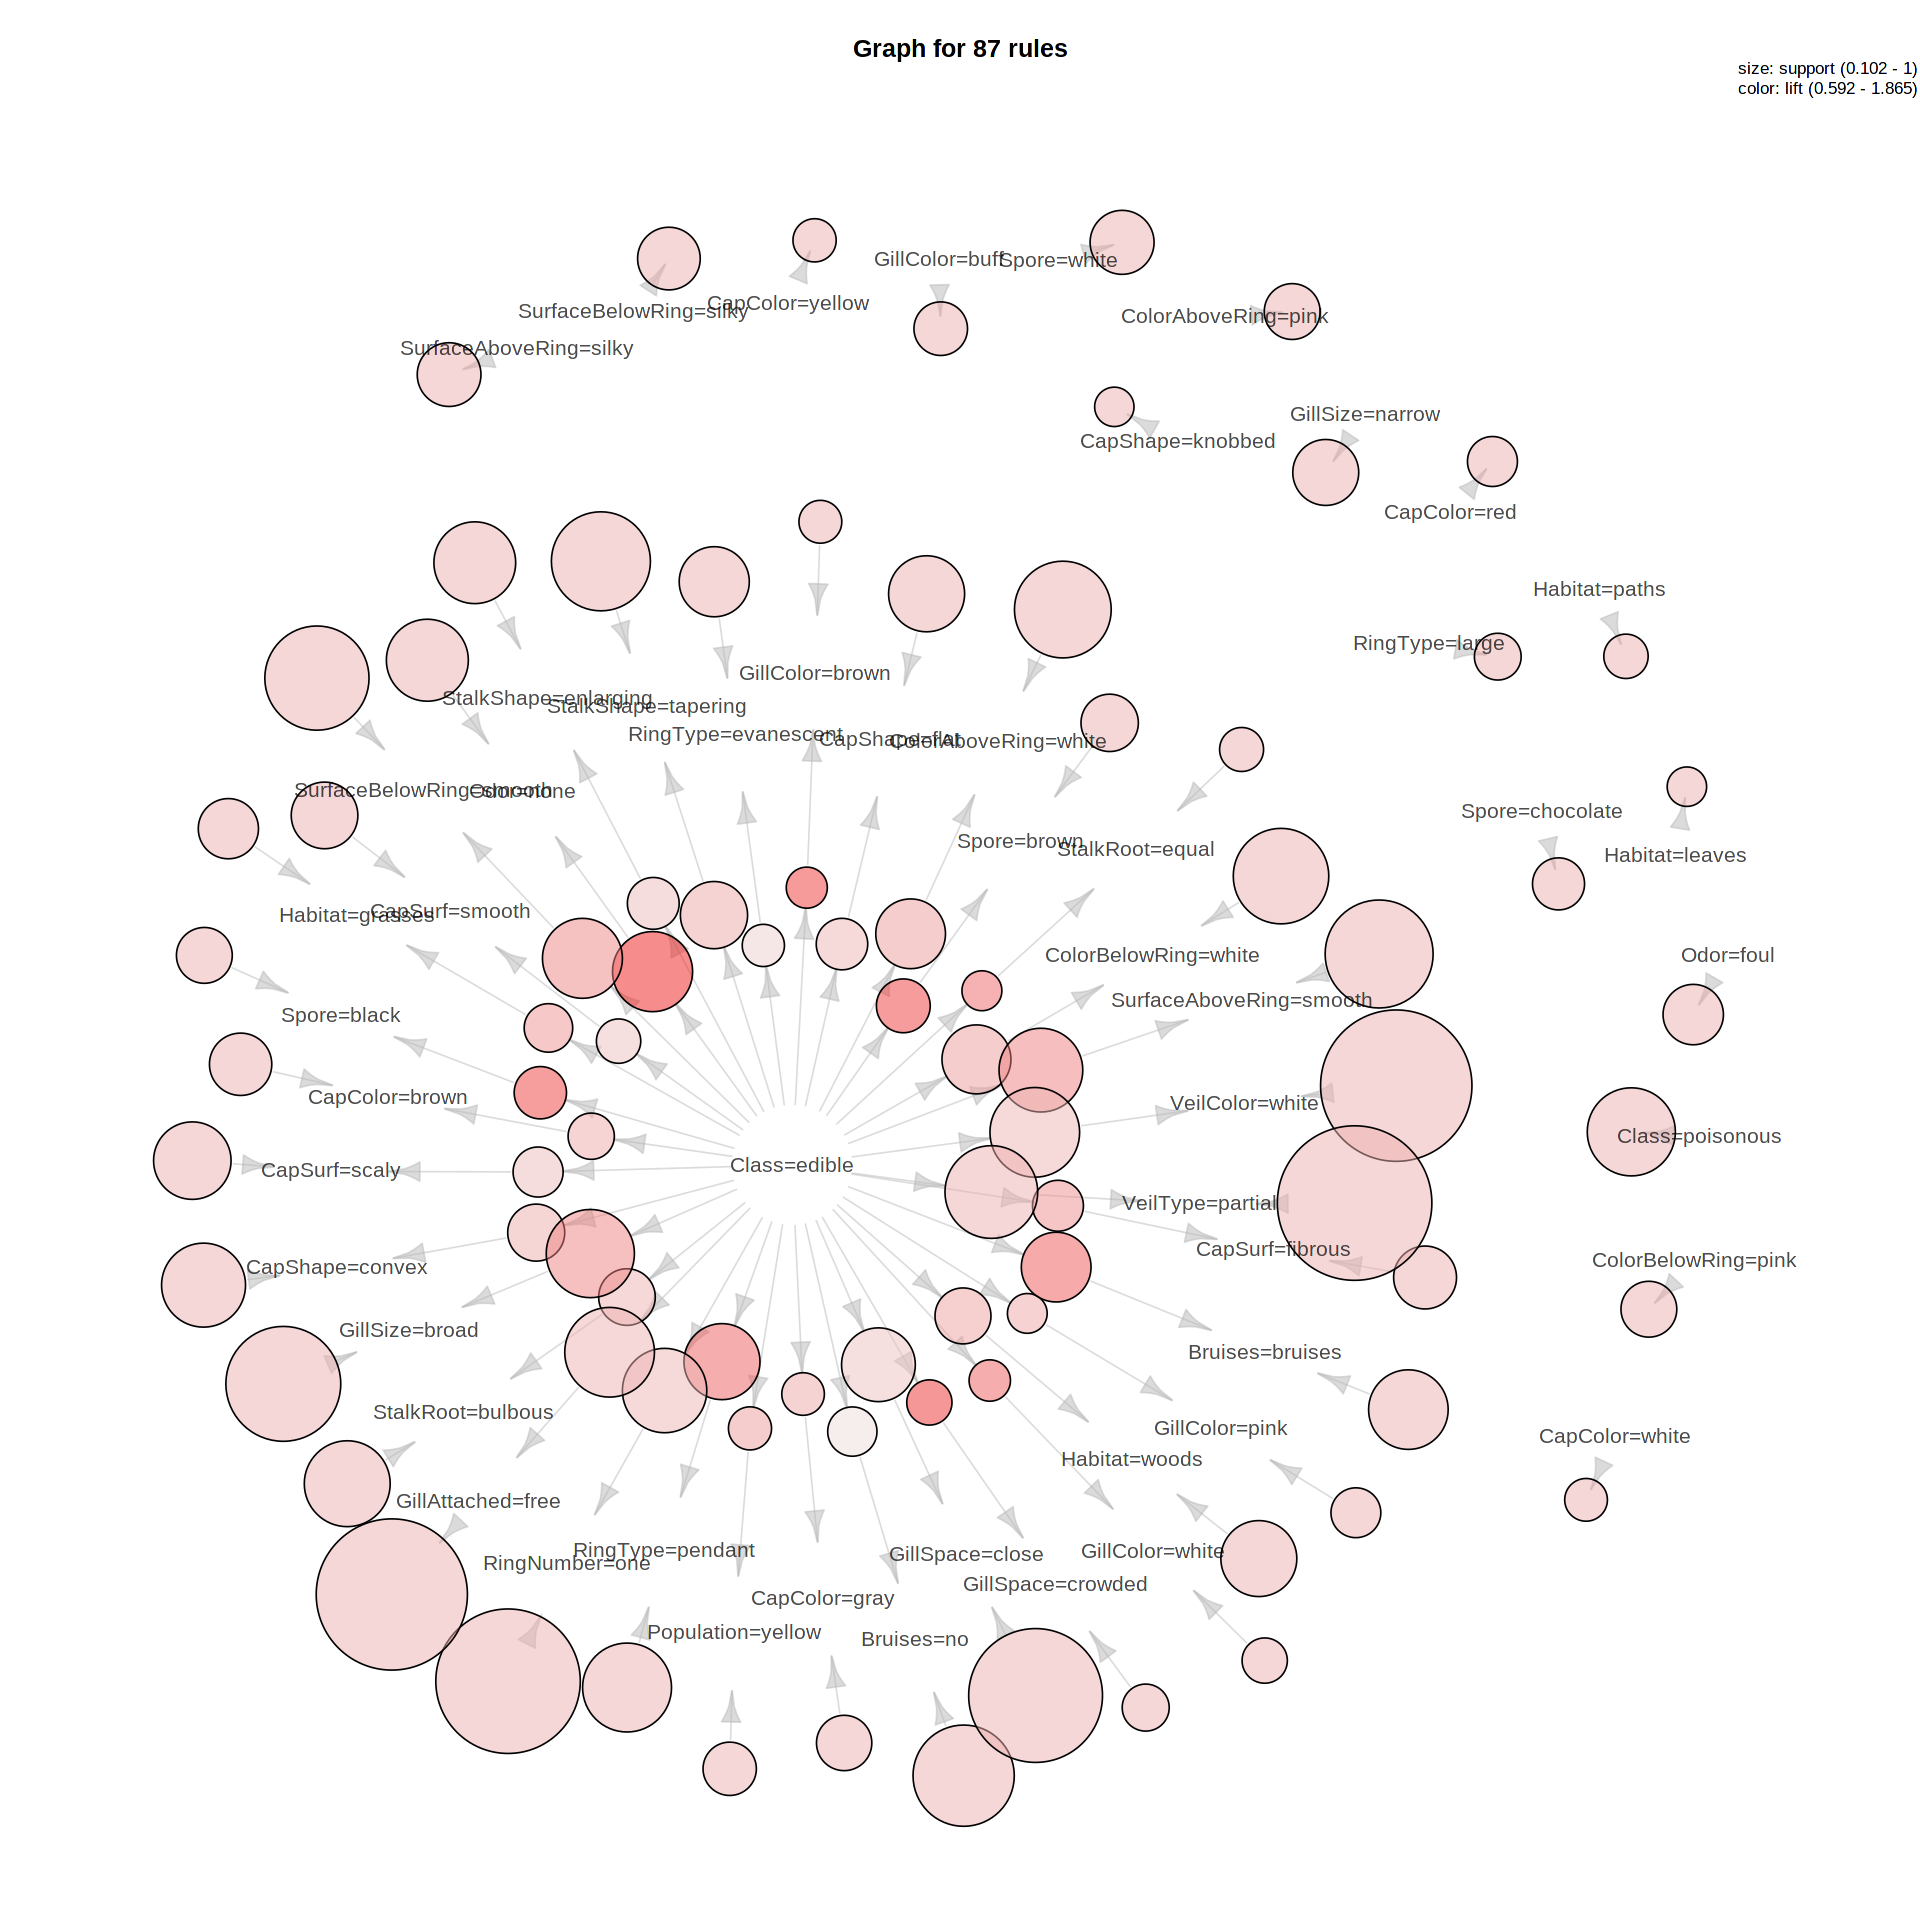

In [103]:
plot(rules, method="graph")

In [104]:
rules <- apriori(data = Mushroom, parameter = list(support=0.1, confidence=0.10,target="rules"),
                appearance= list(default="rhs",lhs="Class=poisonous"))



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 812 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [53 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 done [0.00s].
writing ... [86 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [105]:
rules

set of 86 rules 

In [106]:
inspect(head(sort(rules, by="lift"),15))

     lhs                  rhs                      support   confidence
[1]  {Class=poisonous} => {RingType=large}         0.1595273 0.3309499 
[2]  {Class=poisonous} => {Odor=foul}              0.2658789 0.5515832 
[3]  {Class=poisonous} => {GillColor=buff}         0.2127031 0.4412666 
[4]  {Class=poisonous} => {Spore=chocolate}        0.1949778 0.4044944 
[5]  {Class=poisonous} => {SurfaceAboveRing=silky} 0.2742491 0.5689479 
[6]  {Class=poisonous} => {SurfaceBelowRing=silky} 0.2658789 0.5515832 
[7]  {Class=poisonous} => {GillSize=narrow}        0.2737568 0.5679265 
[8]  {Class=poisonous} => {Habitat=paths}          0.1240768 0.2574055 
[9]  {Class=poisonous} => {Spore=white}            0.2230428 0.4627171 
[10] {Class=poisonous} => {Bruises=no}             0.4052191 0.8406537 
[11] {Class=poisonous} => {ColorAboveRing=pink}    0.1595273 0.3309499 
[12] {Class=poisonous} => {ColorBelowRing=pink}    0.1595273 0.3309499 
[13] {Class=poisonous} => {RingType=evanescent}    0.2176268 0.4

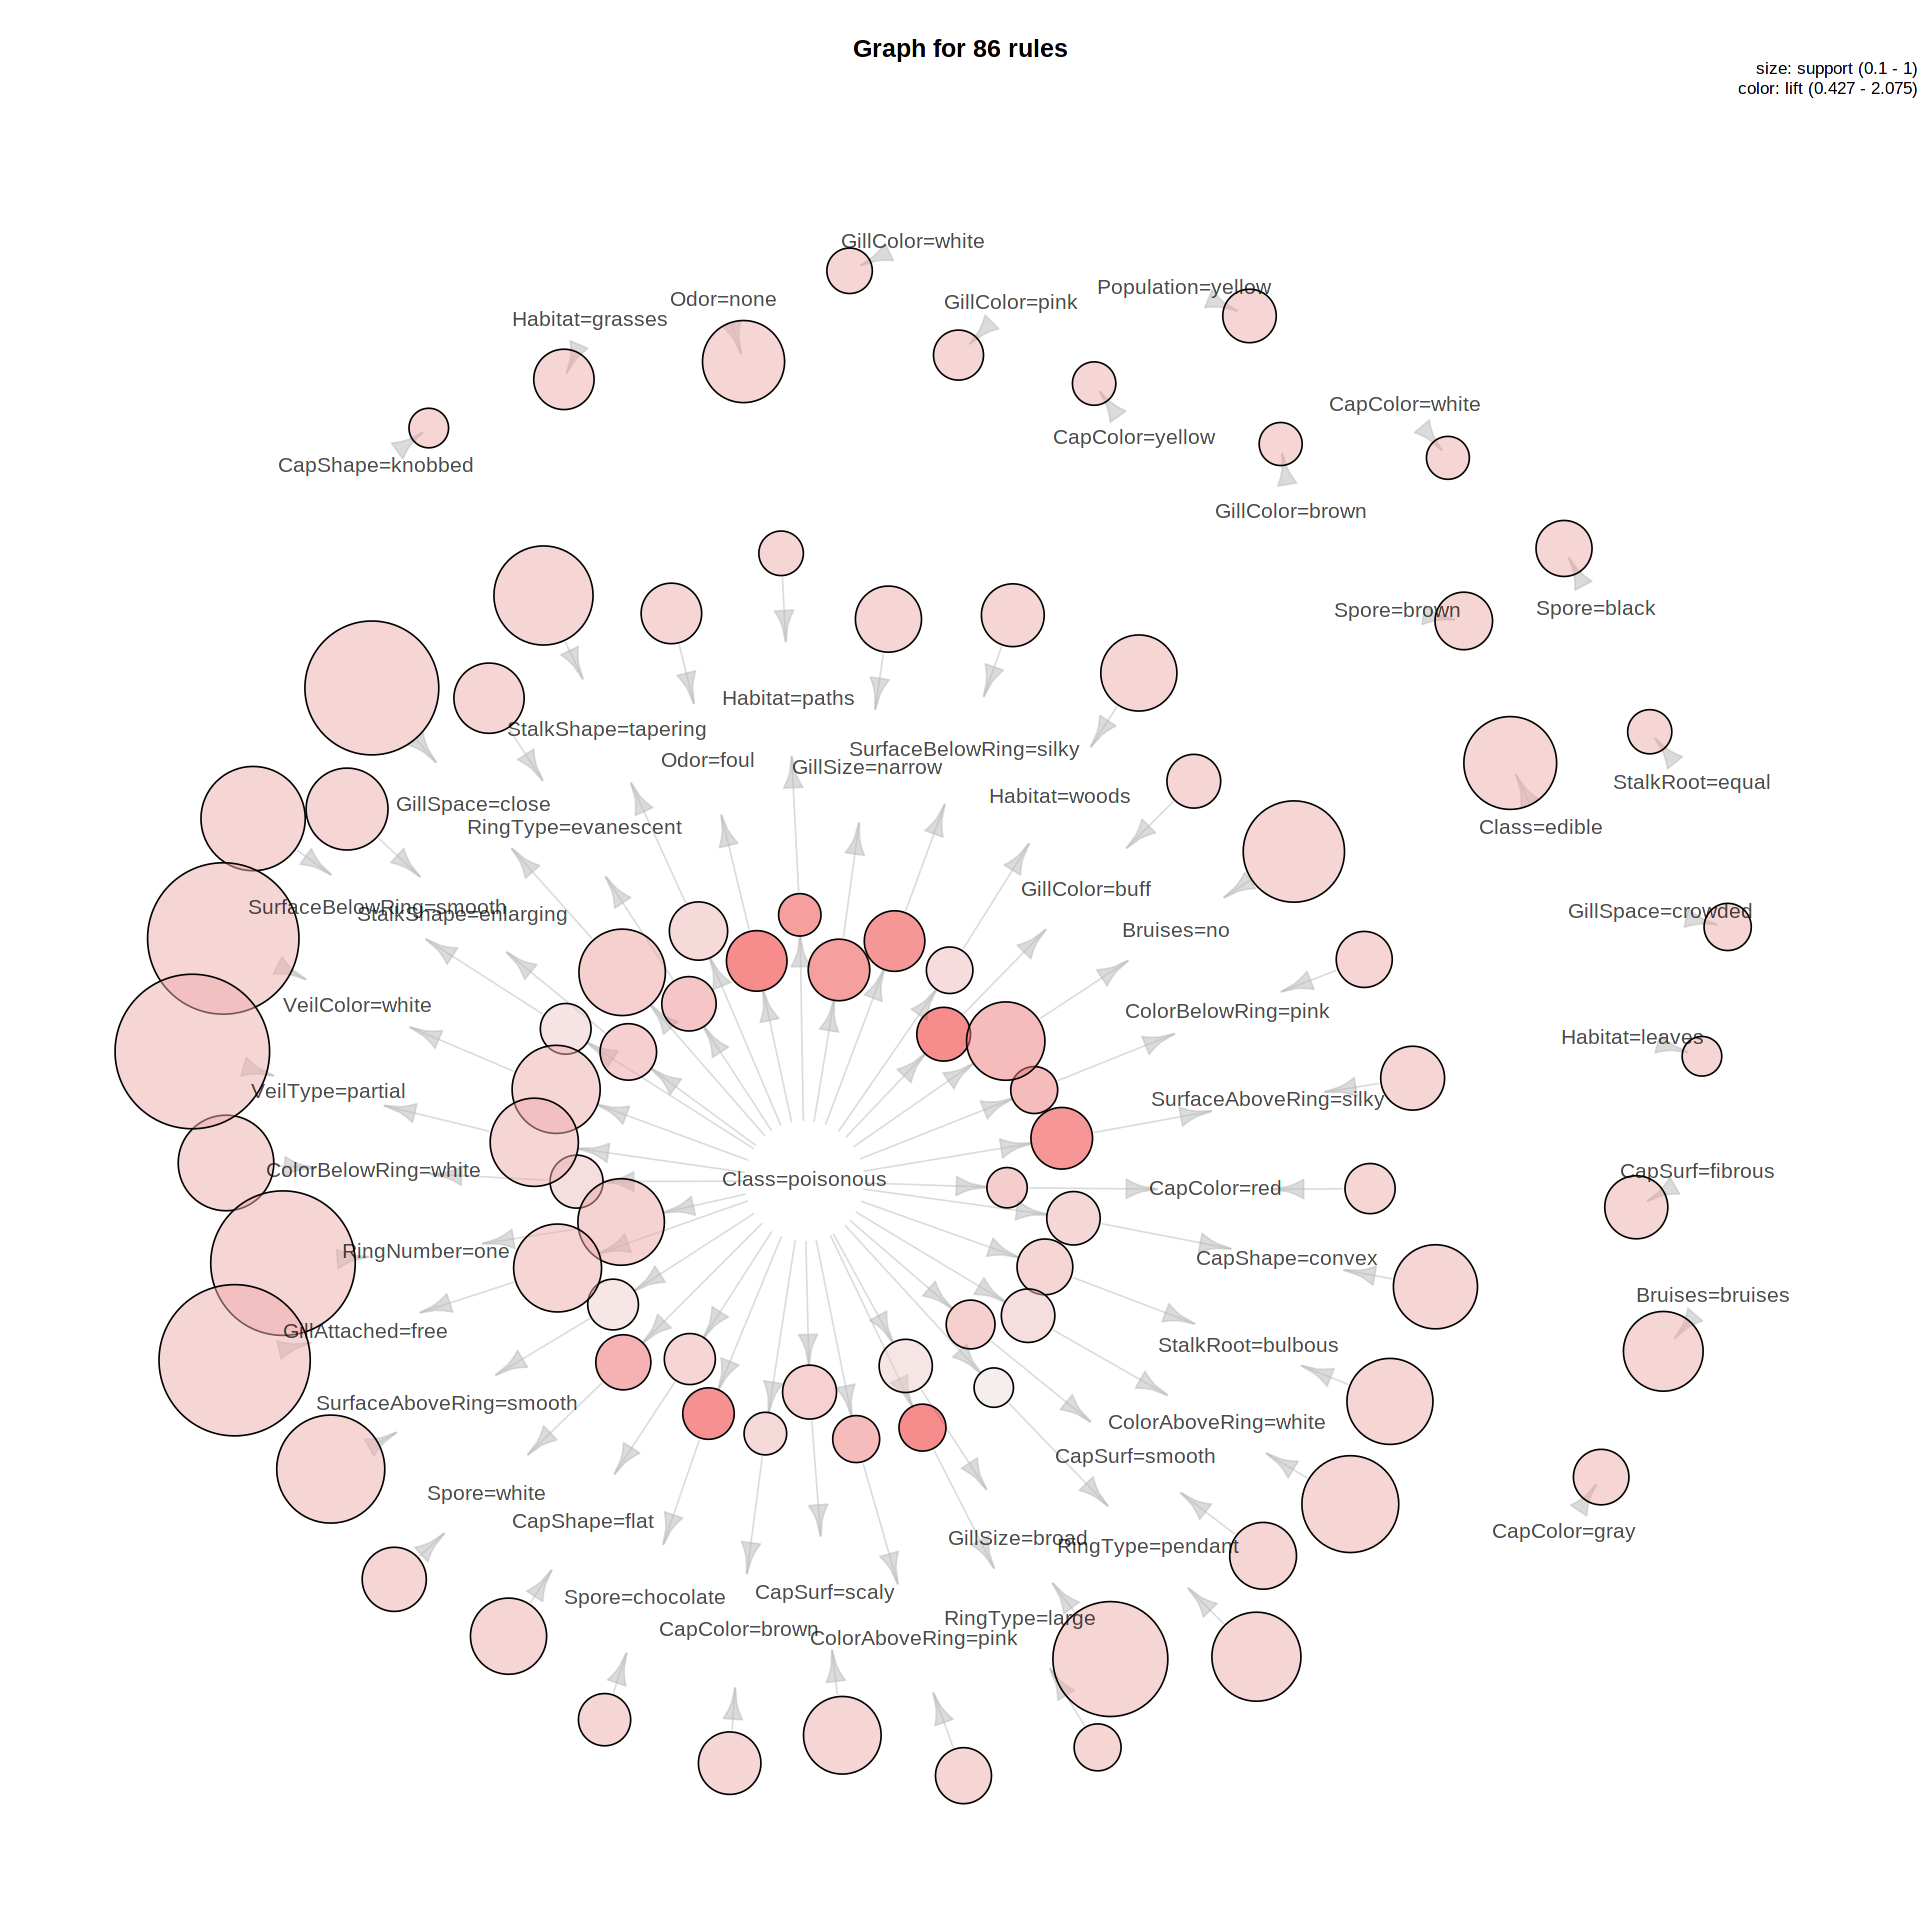

In [107]:
plot(rules, method="graph")